<a href="https://colab.research.google.com/github/alvincharles45/alvincharles45.github.io/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# STEP 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score
)
from imblearn.over_sampling import SMOTE

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)


In [2]:
# STEP 2: Load Dataset
url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv"
data = pd.read_csv(url)

print("✅ Data loaded successfully!")
print("Shape:", data.shape)
display(data.head())


✅ Data loaded successfully!
Shape: (37069, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# STEP 3: Data Cleaning & Transformation

data.replace("unknown", pd.NA, inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

data["pdays"] = data["pdays"].replace(999, -1)

education_mapping = {
    "illiterate": 0,
    "basic.4y": 4,
    "basic.6y": 6,
    "basic.9y": 9,
    "high.school": 12,
    "professional.course": 13,
    "university.degree": 16,
    "unknown": -1
}
data["education"] = data["education"].replace(education_mapping)

categorical_columns = [
    "job", "marital", "default", "housing", "loan",
    "contact", "month", "day_of_week", "poutcome"
]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data["y"] = data["y"].replace({"no": 0, "yes": 1}).astype(int)

print("✅ Data cleaned and encoded successfully!")
print("Final shape:", data.shape)


✅ Data cleaned and encoded successfully!
Final shape: (37069, 42)


/tmp/ipython-input-1174679516.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["education"] = data["education"].replace(education_mapping)
/tmp/ipython-input-1174679516.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["y"] = data["y"].replace({"no": 0, "yes": 1}).astype(int)


In [4]:
# STEP 4: Split Data

X = data.drop("y", axis=1)
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)
print("\nClass balance BEFORE SMOTE:\n", y_train.value_counts(normalize=True))


✅ Data split complete!
Training size: (29655, 41)
Testing size: (7414, 41)

Class balance BEFORE SMOTE:
 y
0    0.886495
1    0.113505
Name: proportion, dtype: float64


In [5]:
# STEP 5: Balance Data using SMOTE

smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied successfully!")
print("Training size after SMOTE:", X_train_resampled.shape)
print("Class balance AFTER SMOTE:\n", y_train_resampled.value_counts(normalize=True))


✅ SMOTE applied successfully!
Training size after SMOTE: (52578, 41)
Class balance AFTER SMOTE:
 y
0    0.5
1    0.5
Name: proportion, dtype: float64


In [6]:
# STEP 6: Train Random Forest Classifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=25,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_resampled, y_train_resampled)
print("✅ Random Forest model trained successfully!")


✅ Random Forest model trained successfully!



📊 Model Performance:
Accuracy: 0.8626922039384948
ROC-AUC Score: 0.7836544369476495

Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.90      0.92      6572
         Yes       0.43      0.60      0.50       842

    accuracy                           0.86      7414
   macro avg       0.69      0.75      0.71      7414
weighted avg       0.89      0.86      0.87      7414



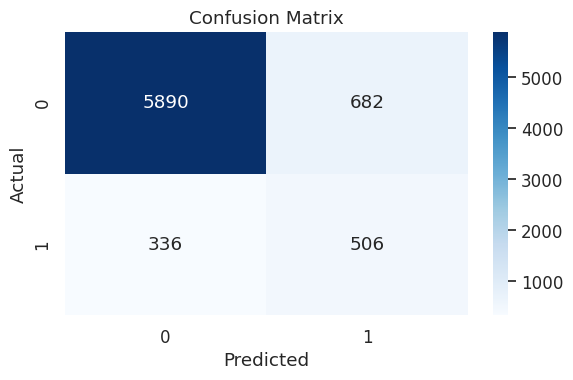

In [7]:
# STEP 7: Evaluate Model

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\n📊 Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2471977237.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


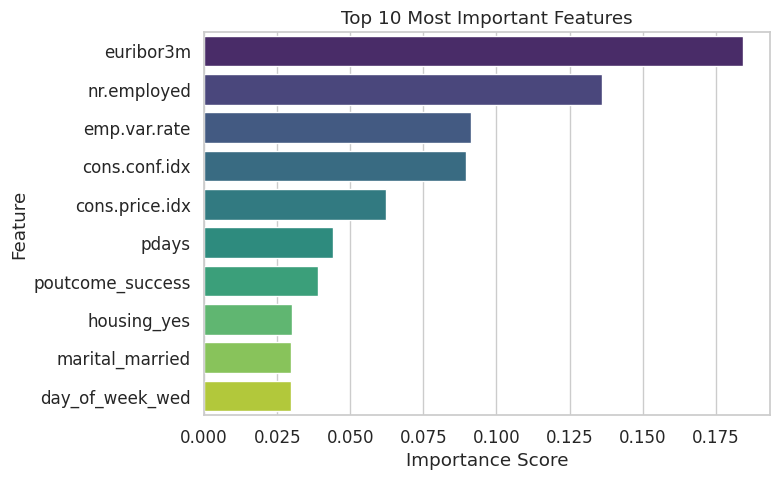


🏆 Top 10 Important Features:
euribor3m           0.184502
nr.employed         0.136018
emp.var.rate        0.091356
cons.conf.idx       0.089699
cons.price.idx      0.062262
pdays               0.044008
poutcome_success    0.039110
housing_yes         0.030035
marital_married     0.029772
day_of_week_wed     0.029734
dtype: float64


In [8]:
# STEP 8: Feature Importance

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feature_importance.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\n🏆 Top 10 Important Features:")
print(top_features)


/tmp/ipython-input-1354924602.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_summary.index, y=marital_summary.values, palette="crest")
/tmp/ipython-input-1354924602.py:22: UserWarning: Glyph 128141 (\N{RING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128141 (\N{RING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


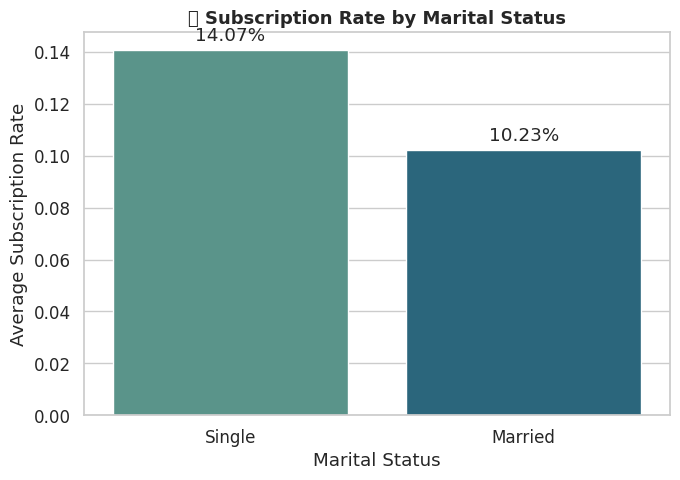

/tmp/ipython-input-1354924602.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_summary.values, y=job_summary.index, palette="viridis")
/tmp/ipython-input-1354924602.py:42: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


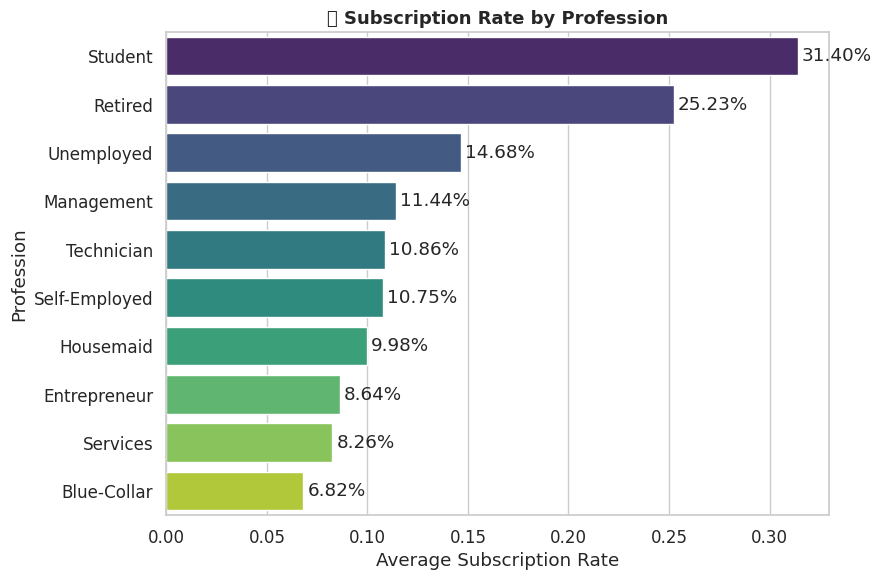

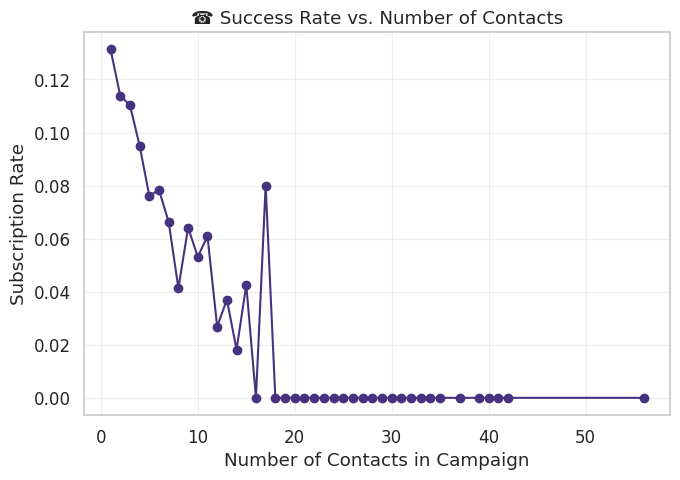

In [9]:
# STEP 9: Business Insights Visuals

marital_cols = [c for c in data.columns if "marital_" in c]
marital_summary = (
    data.melt(id_vars="y", value_vars=marital_cols, var_name="MaritalStatus", value_name="Active")
    .query("Active == 1")
    .groupby("MaritalStatus")["y"].mean()
    .sort_values(ascending=False)
)
marital_summary.index = marital_summary.index.str.replace("marital_", "").str.title()

plt.figure(figsize=(7,5))
sns.barplot(x=marital_summary.index, y=marital_summary.values, palette="crest")
plt.title("💍 Subscription Rate by Marital Status", fontsize=13, weight='bold')
plt.ylabel("Average Subscription Rate")
plt.xlabel("Marital Status")
for i, val in enumerate(marital_summary.values):
    plt.text(i, val + 0.002, f"{val*100:.2f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

job_cols = [col for col in data.columns if "job_" in col]
job_summary = (
    data.melt(id_vars="y", value_vars=job_cols, var_name="Job", value_name="Active")
    .query("Active == 1")
    .groupby("Job")["y"].mean()
    .sort_values(ascending=False)
)
job_summary.index = job_summary.index.str.replace("job_", "").str.title()

plt.figure(figsize=(9,6))
sns.barplot(x=job_summary.values, y=job_summary.index, palette="viridis")
plt.title("💼 Subscription Rate by Profession", fontsize=13, weight='bold')
plt.xlabel("Average Subscription Rate")
plt.ylabel("Profession")
for i, val in enumerate(job_summary.values):
    plt.text(val + 0.002, i, f"{val*100:.2f}%", va='center')
plt.tight_layout()
plt.show()

campaign_effect = data.groupby("campaign")["y"].mean()
plt.figure(figsize=(7,5))
plt.plot(campaign_effect.index, campaign_effect.values, marker="o")
plt.title("☎️ Success Rate vs. Number of Contacts")
plt.xlabel("Number of Contacts in Campaign")
plt.ylabel("Subscription Rate")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# STEP 10: Predict on Holdout Data

holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")

holdout.replace("unknown", pd.NA, inplace=True)
holdout.fillna(data.mode().iloc[0], inplace=True)
holdout["pdays"] = holdout["pdays"].replace(999, -1)
holdout["education"] = holdout["education"].replace(education_mapping)
holdout = pd.get_dummies(holdout, columns=categorical_columns, drop_first=True)

missing_cols = set(X.columns) - set(holdout.columns)
for c in missing_cols:
    holdout[c] = 0
holdout = holdout[X.columns]

predictions = rf.predict(holdout)
pd.DataFrame(predictions, columns=["predictions"]).to_csv("team3-module2-predictions2.0.csv", index=False)
print("📁 Predictions saved to: team3-module2-predictions2.0.csv")


📁 Predictions saved to: team3-module2-predictions2.0.csv


/tmp/ipython-input-3289667163.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  holdout["education"] = holdout["education"].replace(education_mapping)


✅ File Loaded! Total Predictions: 4119

📊 Prediction Breakdown (%):
predictions
0    85.14
1    14.86
Name: proportion, dtype: float64


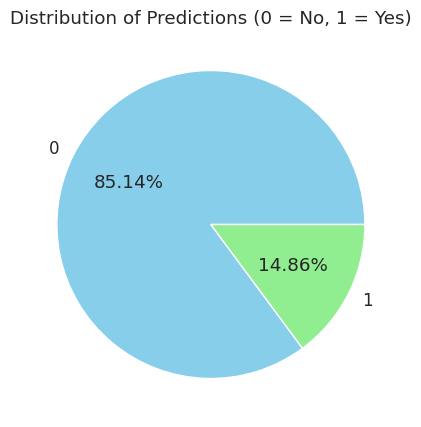

In [12]:
import pandas as pd

preds = pd.read_csv("team3-module2-predictions2.0.csv")

print("✅ File Loaded! Total Predictions:", len(preds))

percentages = preds["predictions"].value_counts(normalize=True) * 100
print("\n📊 Prediction Breakdown (%):")
print(percentages.round(2))

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=["skyblue", "lightgreen"])
plt.title("Distribution of Predictions (0 = No, 1 = Yes)")
plt.show()
